In [47]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")
DPI=800

Imported all.


In [48]:
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
# Open data file
file_dir = "./assets/NC/A_Z_vol_count-all.txt"
df_NC = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_NC)
# Reorder columns
df_NC = df_NC[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Open data file
file_dir = "./assets/FTFP/A_Z_vol_count-all.txt"
df_FTFP = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_FTFP)
# Reorder columns
df_FTFP = df_FTFP[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

In [49]:
# Add production
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
day_in_nano = (8.64 * 10 ** 13)
sim_length = 29.01
df_NC["Production (/yr)"] = df_NC["Counts"] / sim_length
df_FTFP["Production (/yr)"] = df_FTFP["Counts"] / sim_length

# Get total counts

Number of counts per physics model:
Ratio
NC:FTFP: 1:1.004766642364864


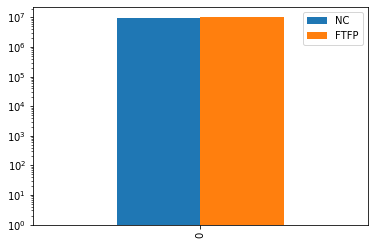

In [50]:
print("Number of counts per physics model:")
df_counts = pd.DataFrame({"NC": [df_NC['Production (/yr)'].sum()],
                          "FTFP": [df_FTFP['Production (/yr)'].sum()]})
df_counts.plot.bar(log=True)
print("Ratio")
print(f"NC:FTFP: 1:{df_FTFP['Production (/yr)'].sum() / df_NC['Production (/yr)'].sum()}")
plt.show()

# Ratio between volumes

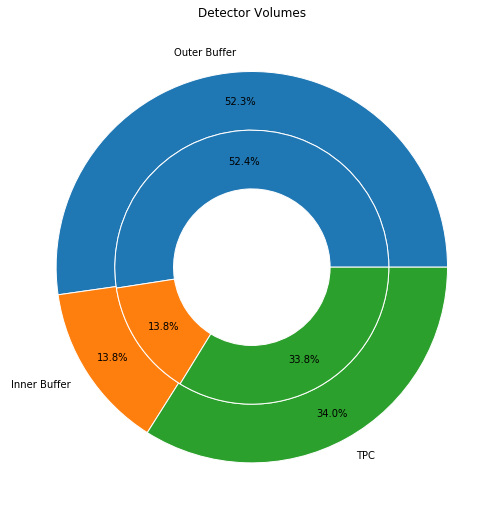

In [51]:
fig, ax = plt.subplots(figsize=(18,9))
size = 0.3
labels=["Outer Buffer", "Inner Buffer", "TPC"]
ax.pie(x=[df_FTFP.loc[df_FTFP["Detector Volume"] == 7,"Production (/yr)"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 9,"Production (/yr)"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 11,"Production (/yr)"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       labels=labels,
       radius=1,
       autopct='%1.1f%%',
       pctdistance=1 - size / 2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(x=[df_NC.loc[df_NC["Detector Volume"] == 7,"Production (/yr)"].sum(),
           df_NC.loc[df_NC["Detector Volume"] == 9,"Production (/yr)"].sum(),
           df_NC.loc[df_NC["Detector Volume"] == 11,"Production (/yr)"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       radius=1 - size, 
       autopct='%1.1f%%',
       pctdistance= 1 - 3 * size/4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(title='Detector Volumes')
plt.show()

# Get yields of each isotope

Average: Production (/yr)    382984.930926
Production (/yr)    416878.023383
dtype: float64


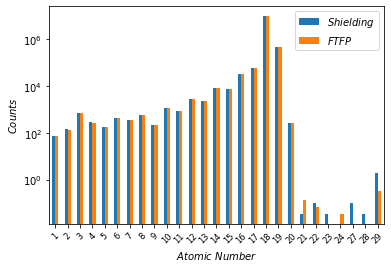

In [67]:
df_NC_counts = df_NC.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_FTFP_counts = df_FTFP.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_combined_counts = pd.concat([df_NC_counts, df_FTFP_counts], axis=1).reset_index()
print(f"Average: {df_combined_counts['Production (/yr)'].mean()}")
ax = df_combined_counts.plot.bar(x="Atomic Number", log=True)
ax.set_ylabel(r"$Counts$")
ax.set_xlabel(r"$Atomic~Number$")
plt.xticks(rotation=45, fontsize="small")
plt.legend(labels=[r"$Shielding$",r"$FTFP$"])
#plt.title("Total Isotope Yields")
plt.savefig('./img/total-iso-yields', dpi=DPI)
plt.show()
#df_NC_counts, df_FTFP_counts

In [53]:
print("Ordered Isotope yields:\n")
print("NC:      ", list(df_NC_counts.sort_values(ascending=False).index))
print("FTFP:    ", list(df_FTFP_counts.sort_values(ascending=False).index))

Ordered Isotope yields:

NC:       [18, 19, 17, 16, 14, 15, 12, 13, 10, 11, 3, 8, 6, 7, 4, 20, 9, 5, 2, 1, 29, 22, 27, 28, 21, 23]
FTFP:     [18, 19, 17, 16, 14, 15, 12, 13, 10, 11, 3, 8, 6, 7, 4, 20, 9, 5, 2, 1, 29, 21, 22, 24]


# Compare important isotopes

In [54]:
df_NC_imp = pd.read_csv(f"./assets/NC/important_iso.csv")
df_FTFP_imp = pd.read_csv(f"./assets/FTFP/important_iso.csv")
min_b_e = 30
max_b_e = 200
df_NC_b = df_NC_imp[df_NC_imp[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]
df_FTFP_b = df_FTFP_imp[df_FTFP_imp[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]

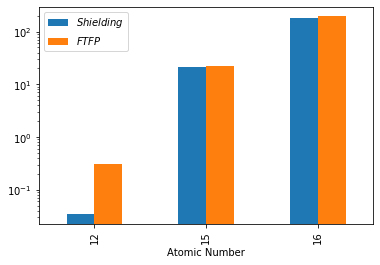

In [55]:
df_NC_b_counts = df_NC_b.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_FTFP_b_counts = df_FTFP_b.groupby(['Atomic Number'])["Production (/yr)"].sum()
temp = pd.concat([df_NC_b_counts, df_FTFP_b_counts], axis=1).reset_index()
temp.plot.bar(x="Atomic Number", log=True)
ax.set_ylabel(r"$Counts$")
ax.set_xlabel(r"$Atomic Number$")
#plt.title("Important Beta Productions (/yr)")
plt.legend(labels=[r"$Shielding$",r"$FTFP$"])
plt.show()